## SVM Implementation using Pegasos
**Formulating SVM as Unconstrained Optimization Problem**

### Generate Dataset

In [1]:
from sklearn.datasets import make_classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X,Y = make_classification(n_classes=2,n_samples = 400,n_clusters_per_class=1,random_state=3,
                         n_features = 2,n_informative=2,n_redundant=0)

In [4]:
# Convert our Y-labels into {-1,1}
Y[Y==0] = -1 # Broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

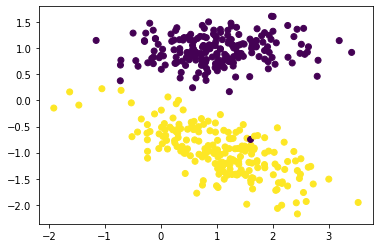

In [5]:
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

In [6]:
class SVM:
    def __init__(self,C = 1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0

        losses = []
        # Training from here
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [10]:
mySVM = SVM()
W,b,losses = mySVM.fit(X,Y,maxItr=200)
print(losses[0])
print(losses[-1])

400.0
14.51960358203334


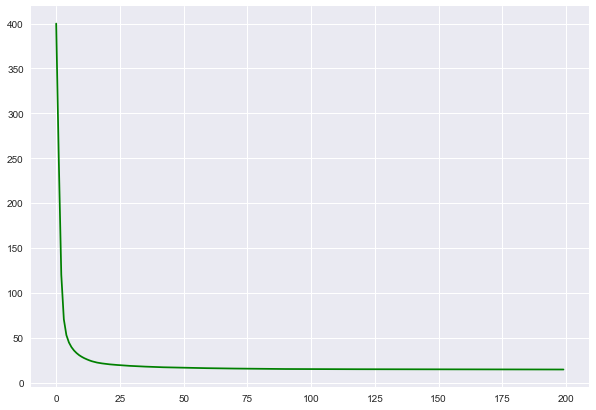

In [11]:
plt.style.use("seaborn")
plt.figure(figsize = (10,7))
plt.plot(losses,color = 'green')
plt.show()

In [13]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[-0.34334066 -2.09113044]] 0.42300000000000026


In [24]:
def plotHyperplane(w1,w2,b):
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2 # WX + B = 0
    x_n = -(w1*x1+b+1)/w2 # WX + B = -1
    x_p = -(w1*x1+b-1)/w2 # WX + B = 1
    
    plt.figure(figsize = (16,12))
    plt.plot(x1,x2,color = 'green',label = "Hyperplane WX + B = 0")
    plt.plot(x1,x_n,color = 'blue',label = '-ve Hyperplane WX + B = -1')
    plt.plot(x1,x_p,color = 'purple',label = '+ve Hyperplane WX + B = 1')
    plt.legend()
    
    plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.copper)
    plt.show()

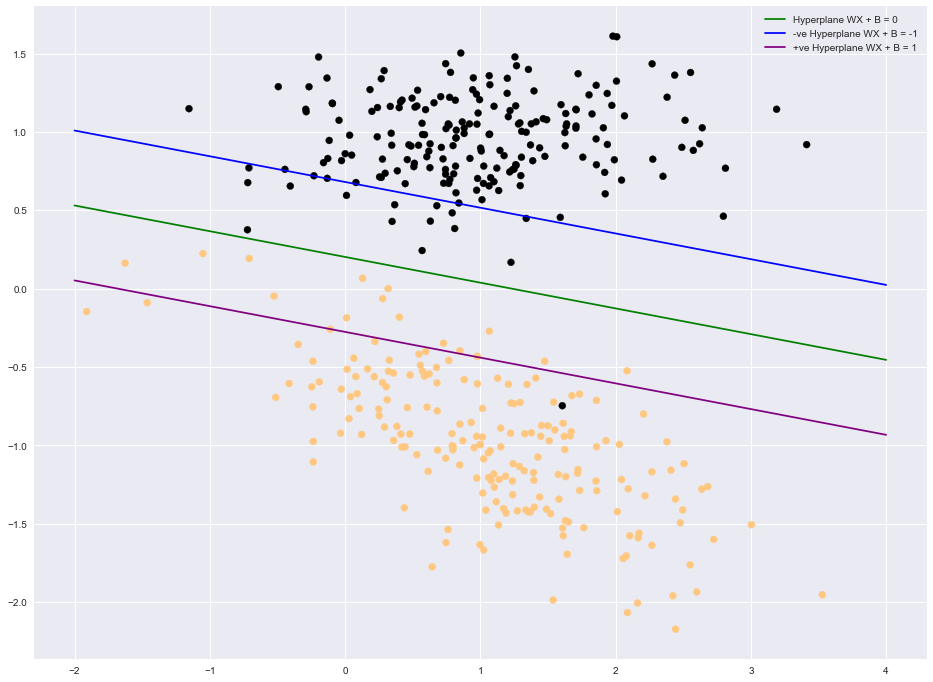

In [25]:
plotHyperplane(W[0,0],W[0,1],B)

### Visualising Support Vectors, Positive and Negative Hyperplanes

In [34]:
svm = SVM(C = 1000)
W,B,losses = svm.fit(X,Y,maxItr = 100)

In [35]:
W,B

(array([[-11.57889212, -35.01381665]]), 4.0)

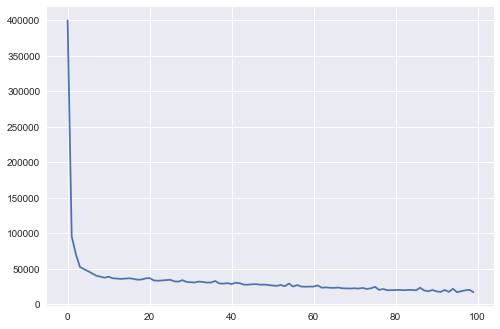

(400000.0, 17200.497724651777)

In [36]:
plt.plot(losses)
plt.show()
losses[0],losses[-1]

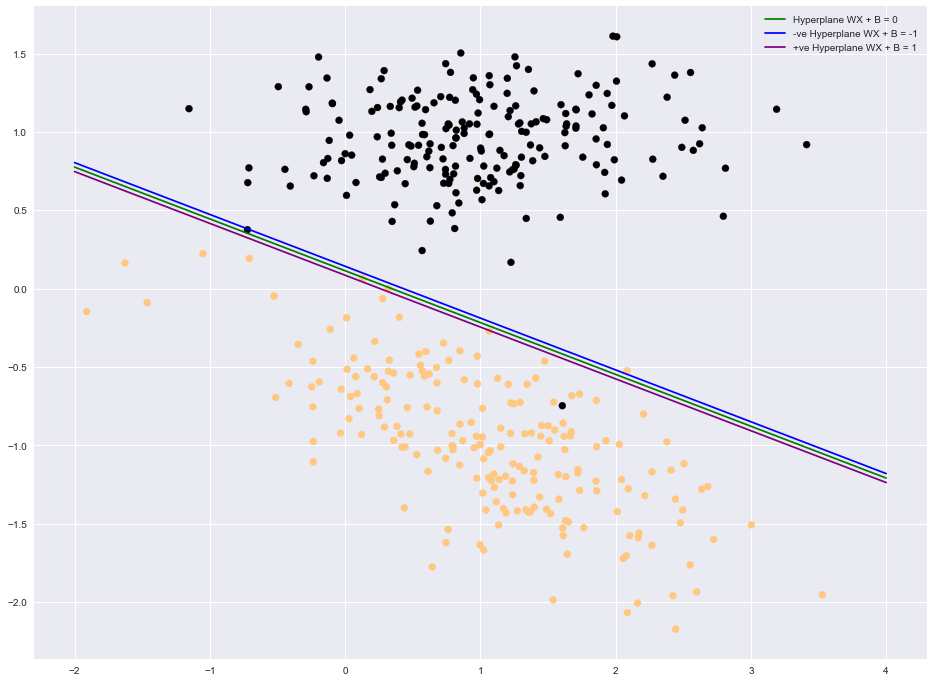

In [37]:
plotHyperplane(W[0,0],W[0,1],B)